# Which months are most rented?

In this case, I'm looking for there are months that people would rather stay.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('calendar.csv')

In [4]:
df.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [5]:
df.shape

(1393570, 4)

## Understading and converting date column
Try to understand each column and convert day to month

In [6]:
# understading the column available. In this case if the house is available or not.
pd.unique(df.available)

array(['t', 'f'], dtype=object)

In [7]:
#checking the type of date
type(df.date)

pandas.core.series.Series

In [8]:
#converting date column to datetime type
df.date = pd.to_datetime(df.date)

In [9]:
#formating date column to month and year ex: 01/2021
df.date = df['date'].dt.strftime('%m/%Y')

In [10]:
#checking the results
df.head()

,listing_id,date,available,price
0,241032,01/2016,t,$85.00
1,241032,01/2016,t,$85.00
2,241032,01/2016,f,NaN
3,241032,01/2016,f,NaN
4,241032,01/2016,f,NaN


## Separating by month and ploting

I got only available calendar and plot the size of each month.

In [11]:
#creating a dataframe with only available days.
ava_df = df[df['available']=='t']

In [16]:
#checking the results
pd.unique(ava_df.available)

array(['t'], dtype=object)

In [17]:
ava_df.head()

,listing_id,date,available,price
0,241032,01/2016,t,$85.00
1,241032,01/2016,t,$85.00
9,241032,01/2016,t,$85.00
10,241032,01/2016,t,$85.00
14,241032,01/2016,t,$85.00


In [13]:
#getting how many days was user by month.
ava_df.groupby(['date']).size()

date
01/2016    59239
01/2017     5698
02/2016    73321
03/2016    83938
04/2016    76037
05/2016    79971
06/2016    77244
07/2016    74222
08/2016    76347
09/2016    77246
10/2016    82438
11/2016    81780
12/2016    87061
dtype: int64

### Removing 01/2017
because it wasn't show the reality of this month.

In [14]:
#Getting all month except '01/2017'
ava_df = ava_df.loc[ava_df['date']!='01/2017']
ava_df.head()

,listing_id,date,available,price
0,241032,01/2016,t,$85.00
1,241032,01/2016,t,$85.00
9,241032,01/2016,t,$85.00
10,241032,01/2016,t,$85.00
14,241032,01/2016,t,$85.00


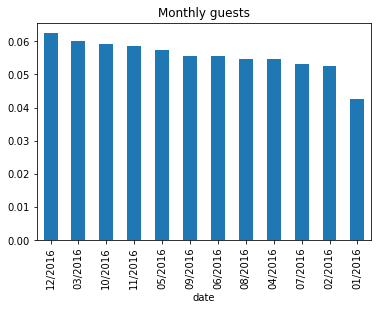

In [15]:
ava_vals = ava_df.groupby(['date']).size().sort_values(ascending=False)

(ava_vals/df.shape[0]).plot(kind="bar");
plt.title("Monthly guests");

## Conclusion

There aren't a month that people prefer the most.